
✅ Model loaded successfully.


Processing images: 0it [00:00, ?it/s]

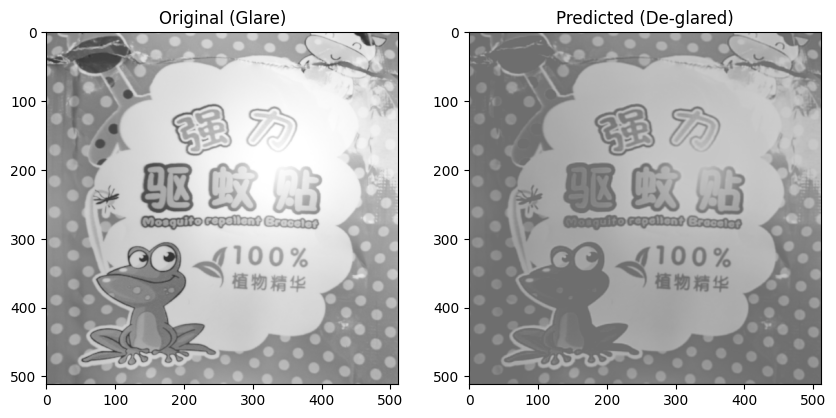

Processing images: 1it [00:00,  1.84it/s]

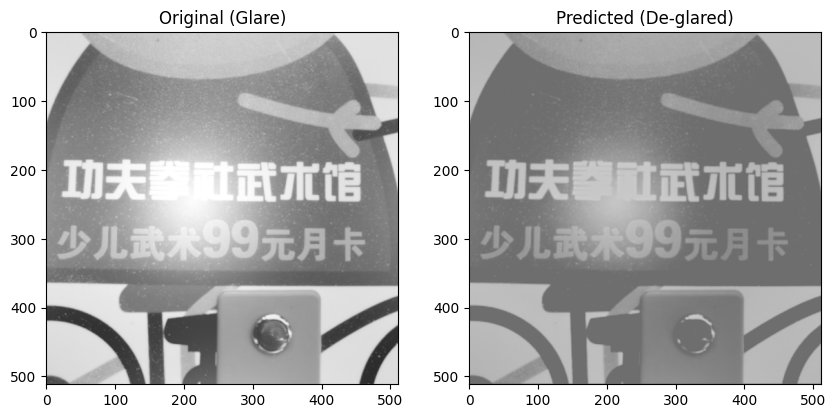

Processing images: 2it [00:00,  2.49it/s]

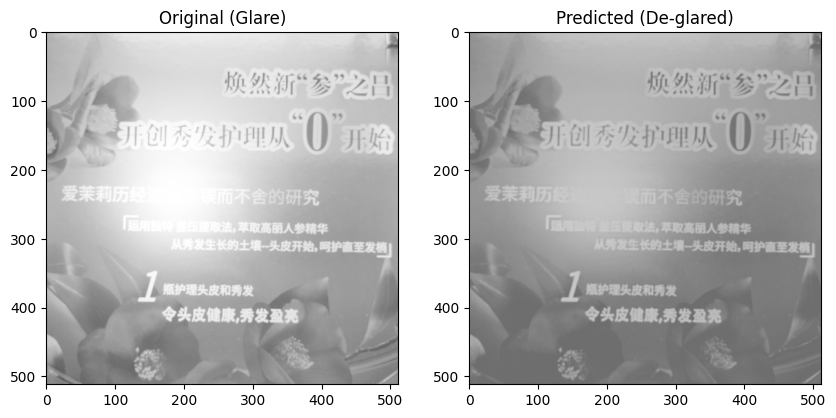

Processing images: 3it [00:01,  2.88it/s]

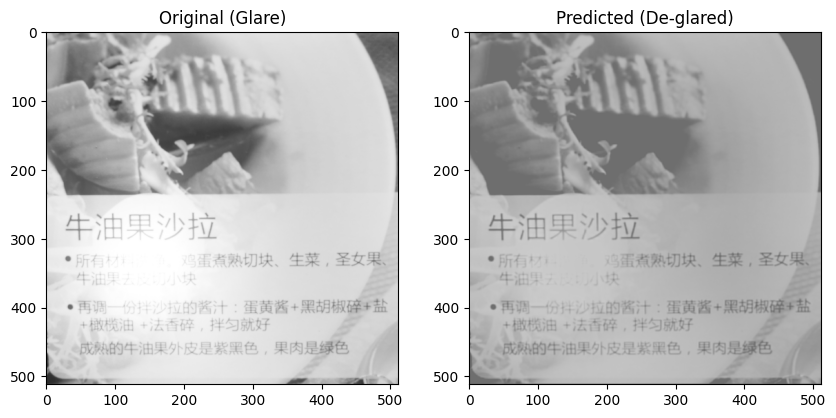

Processing images: 4it [00:01,  2.83it/s]

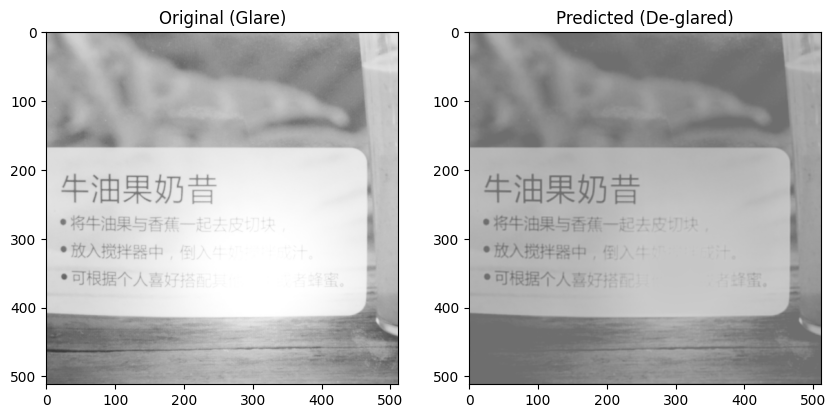

Processing images: 5it [00:01,  2.50it/s]

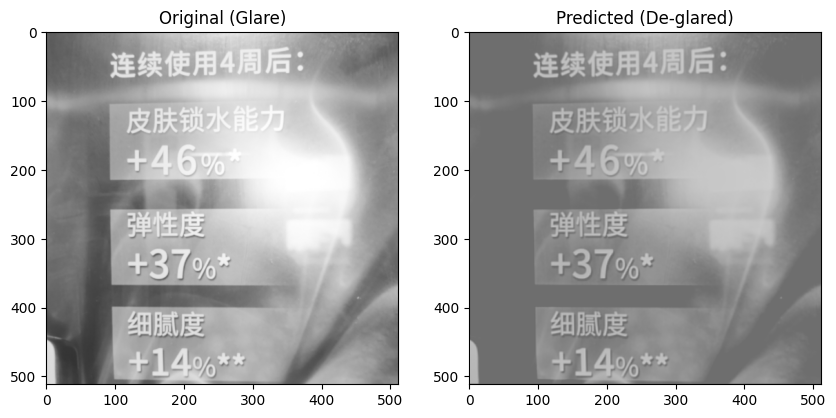

Processing images: 6it [00:02,  2.44it/s]

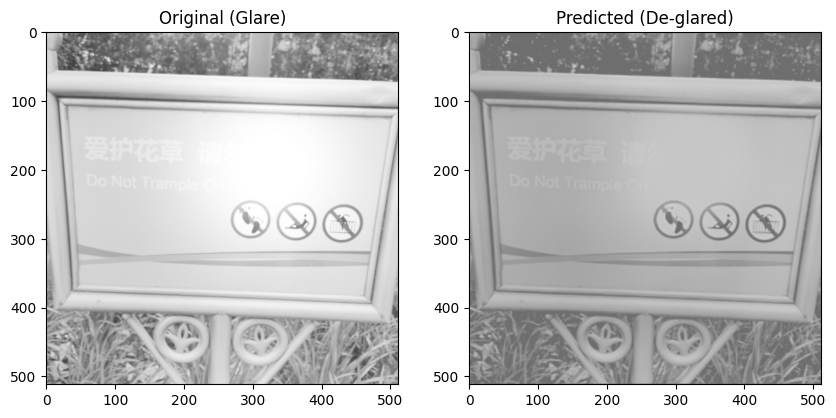

Processing images: 7it [00:02,  2.22it/s]

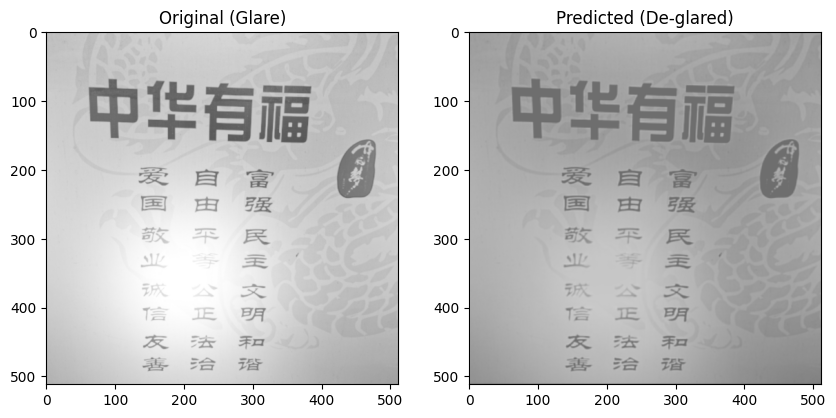

Processing images: 8it [00:03,  2.35it/s]

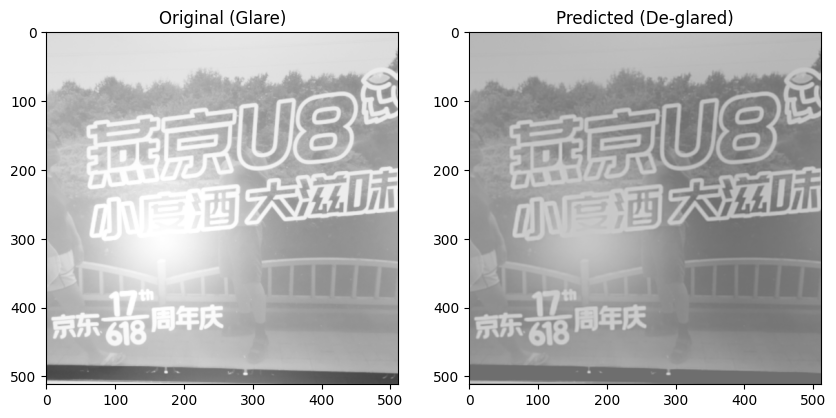

Processing images: 9it [00:03,  2.53it/s]

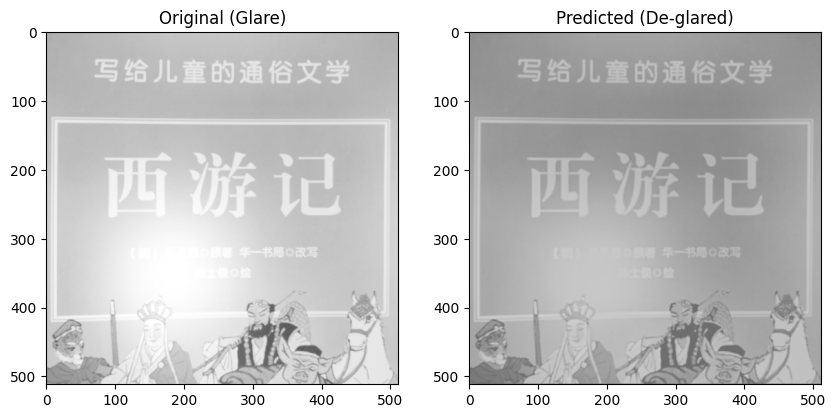

Processing images: 10it [00:03,  2.63it/s]

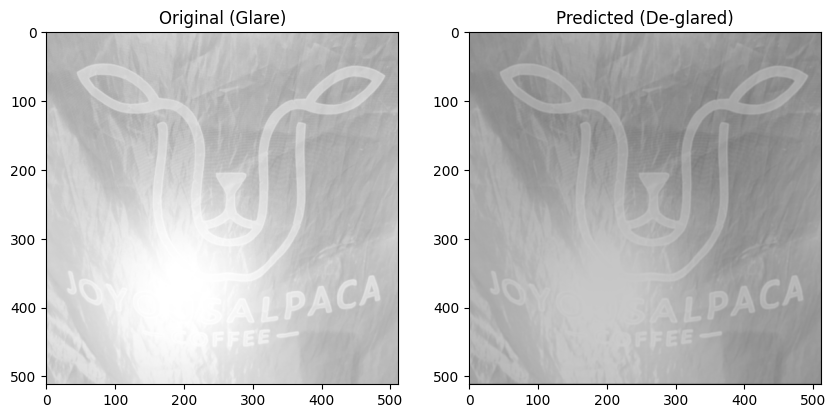

Processing images: 11it [00:04,  2.43it/s]

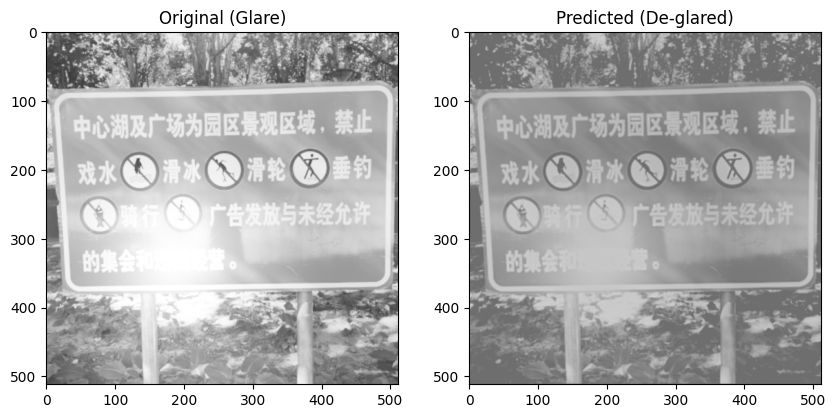

Processing images: 12it [00:04,  2.33it/s]

In [ ]:
# ✅ Install necessary packages (if not installed)
!pip install torch torchvision matplotlib tqdm

import sys
import os
from pathlib import Path
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

# ✅ Add the parent directory to the Python path to resolve imports
sys.path.append(os.path.dirname(os.getcwd()))

# ✅ Import the trained Auto model
from models.autoencoder.auto import Auto  # Ensure the model path is correct

# ✅ Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ✅ Define paths
MODEL_PATH = Path("../models/final_glare_removal_autoencoder.pth")  # Ensure correct model path
TEST_IMAGES_DIR = Path("../data/SD1/test_images")  # Folder with new test images
OUTPUT_DIR = Path("../data/SD1/output")  # Folder to save output images
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)  # Ensure output directory exists

# ✅ Define Transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor
])

# ✅ Load trained model
model = Auto().to(device)  # Ensure Auto model is correctly defined in `models/autoencoder/auto.py`
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()  # Set to evaluation mode
print("✅ Model loaded successfully.")

# ✅ Inference function
def process_image(img_path):
    """Runs inference on a single image."""
    image = Image.open(img_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():
        output_tensor = model(input_tensor)

    # Convert to NumPy for visualization
    output_image = output_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy().clip(0, 1)

    return image, output_image

# ✅ Run inference on all test images
for image_path in tqdm(TEST_IMAGES_DIR.glob("*.png"), desc="Processing images"):
    original_image, predicted_image = process_image(image_path)

    # ✅ Save the de-glared output image
    output_path = OUTPUT_DIR / f"processed_{image_path.name}"
    plt.imsave(output_path, predicted_image)

    # ✅ Show results
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image)
    axes[0].set_title("Original (Glare)")
    axes[1].imshow(predicted_image)
    axes[1].set_title("Predicted (De-glared)")
    plt.show()

print(f"✅ Processed images saved to: {OUTPUT_DIR}")
